In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('C:\\Users\\Omar\\Desktop\\Дата аналитик\\Python\\Lesson_3_mid_pd\\lesson_3_data__1_.csv', encoding = 'windows-1252')

In [5]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nº 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUÁ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [6]:
users_df = df[['tc','art_sp']]

In [7]:
users_df.head()

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nº 5 500 G Brand_1
3,95931501,FIDEO FIDEUÁ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [8]:
users_df = users_df.rename(columns = {'tc':'user_id','art_sp':'brand_info'})

In [9]:
users_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nº 5 500 G Brand_1
3,95931501,FIDEO FIDEUÁ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [10]:
def split_brand(brand_name):
    return brand_name.split(' ')[-1]

In [11]:
users_df['brand_name'] = users_df.brand_info.apply(split_brand)

In [12]:
# users_df.brand_info.apply(lambda x: x.split(' ')[-1])
# функция для разделения строку чтобы получит имя брэнда

In [13]:
users_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nº 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUÁ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [14]:
#лоялные покупатели
users_purchases = users_df.groupby('user_id', as_index =False)\
    .agg({'brand_name':'count'})\
    .rename(columns = {'brand_name':'purchases'})\
    .query('purchases >= 5')

In [15]:
# 50% больше или меньше
users_purchases.median()

user_id      28425471.0
purchases           7.0
dtype: float64

In [16]:
users_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [17]:
users_unique_brands = users_df.groupby('user_id',as_index=False)\
    .agg({'brand_name':pd.Series.nunique})\
    .rename(columns={'brand_name':'unique_brands'})

In [18]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [19]:
lovely_brand_purchases_df = users_df.groupby(['user_id','brand_name'], as_index=False)\
    .agg({'brand_info':'count'})\
    .sort_values(['user_id','brand_info'], ascending=[False, False])\
    .groupby('user_id', as_index=False)\
    .head(1)\
    .rename(columns={'brand_name':'lovely_brand', 'brand_info':'lovely_brand_purchases'})

In [20]:
lovely_brand_purchases_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [21]:
d ={'x':[13,4,5,6,7],'y':[34,5,6,7,3]}

In [22]:
# d ={'x':[13,4,5,6,7],'y':[34,5,6,7,3]} 
# одномерная структура
# d = pd.Series(d)
# двухмерная структура
# d = pd.DataFrame(d)

In [23]:
loyalty_df = users_purchases\
    .merge(users_unique_brands, on='user_id', how='inner')\
    .merge(lovely_brand_purchases_df, on='user_id', how='inner')
# how = {'inner', 'rigth','left','outer','cross' }

In [24]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [25]:
loyalty_users = loyalty_df[loyalty_df.unique_brands ==1]

In [26]:
loyalty_users

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [27]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases/loyalty_df.purchases

In [28]:
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,1.000000
3379,1408783189,10,2,Store_Brand,8,0.800000
3380,1408783379,6,2,Brand_1,4,0.666667
3381,1408798879,8,3,Store_Brand,4,0.500000


C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


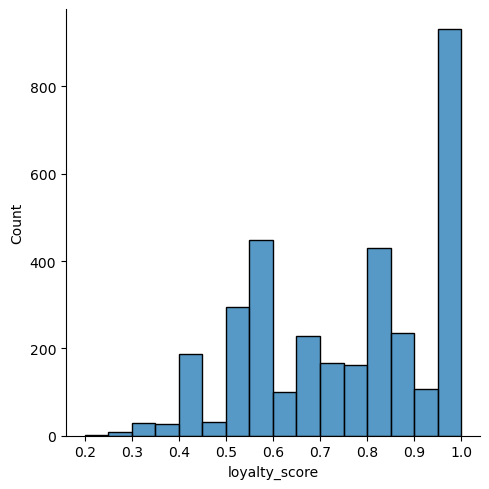

In [29]:
ax = sns.displot(loyalty_df.loyalty_score, kde=False)

In [30]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False)\
    .agg({'loyalty_score':'median', 'user_id':'count'})

In [31]:
brands_loyalty 

,lovely_brand,loyalty_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5
5,Brand_7,0.444444,9
6,Store_Brand,0.750000,715


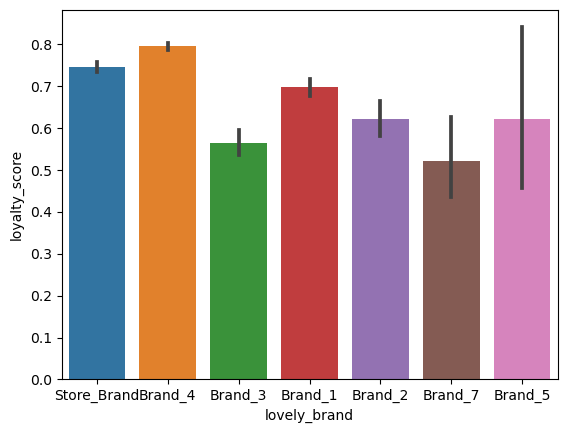

In [32]:
ax = sns.barplot(x = loyalty_df.lovely_brand, y = loyalty_df.loyalty_score, data = brands_loyalty ) 